# Random Forest

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model Accuracy: 0.9767
Model Precision: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



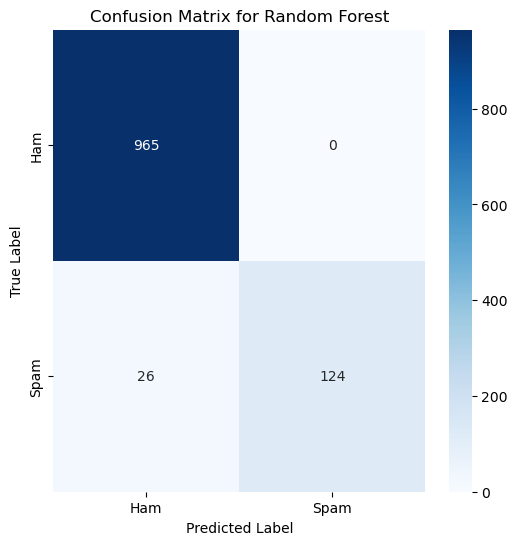

In [8]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('spamain.csv', encoding='ISO-8859-1')

df = df[['v1', 'v2']]  
df.columns = ['label', 'message'] 
df.dropna(inplace=True)  
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  

ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower() 
    tokens = nltk.word_tokenize(text) 
    tokens = [word for word in tokens if word.isalnum()]  
    tokens = [word for word in tokens if word not in stopwords.words('english')] 
    tokens = [ps.stem(word) for word in tokens]  
    return " ".join(tokens)

df['message'] = df['message'].apply(preprocess_text) 

vectorizer = TfidfVectorizer(max_features=3000)  
X = vectorizer.fit_transform(df['message']).toarray()
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Classification Report:\n{report}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



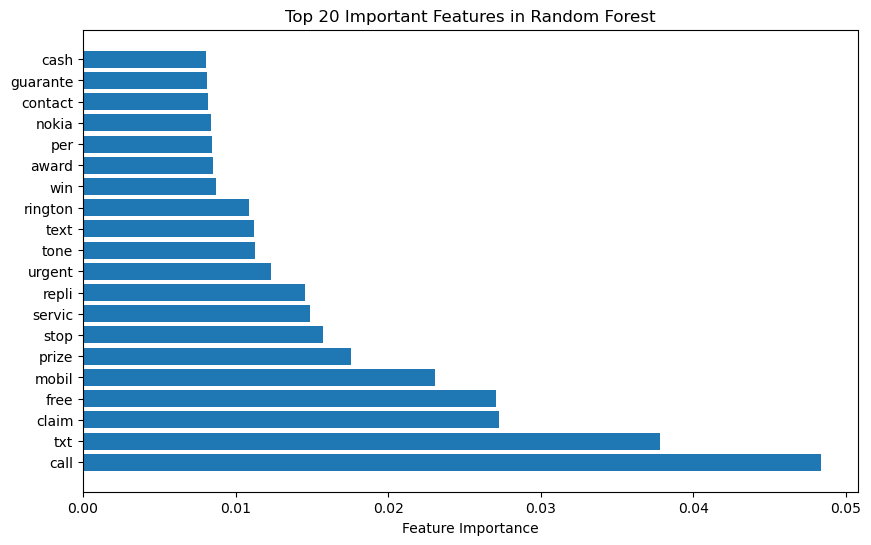

In [3]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the indices of the top 20 most important features
indices = np.argsort(feature_importances)[-20:]

# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(range(20), feature_importances[indices], align='center')
plt.yticks(range(20), [vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()



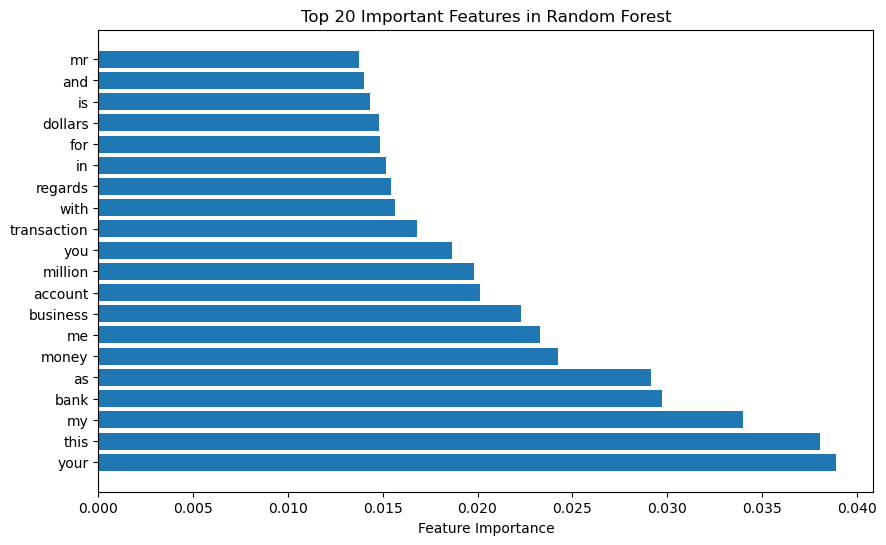

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load and preprocess the data
data = pd.read_csv('spamham.csv', encoding='ISO-8859-1')
data = data[['Text', 'Label']]
data.columns = ['message', 'label']
data.dropna(inplace=True)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for efficiency
X = vectorizer.fit_transform(data['message'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the indices of the top 20 most important features
indices = np.argsort(feature_importances)[-20:]

# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(range(20), feature_importances[indices], align='center')
plt.yticks(range(20), [vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


# Second dataset https://www.kaggle.com/datasets/hailinsong/spam-ham-email-combined-dataset

In [6]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')


data = pd.read_csv('spamham.csv', encoding='ISO-8859-1')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
data

,Text,Class,Label
0,Supply Quality China's EXCLUSIVE dimensions at...,1,spam
1,over. SidLet me know. Thx.,0,ham
2,"Dear Friend,Greetings to you.I wish to accost ...",1,spam
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1,spam
4,Not a surprising assessment from Embassy.,0,ham
...,...,...,...
4840,It has been prepared- ready for your signature...,0,ham
4841,And to you too,0,ham
4842,<html><head><style>P{margin:0px;padding:0px}body,1,spam
4843,Robinson talking now voice cracking but resolu...,0,ham


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model Accuracy: 0.9763
Model Precision: 0.9855
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       544
           1       0.99      0.96      0.97       425

    accuracy                           0.98       969
   macro avg       0.98      0.97      0.98       969
weighted avg       0.98      0.98      0.98       969



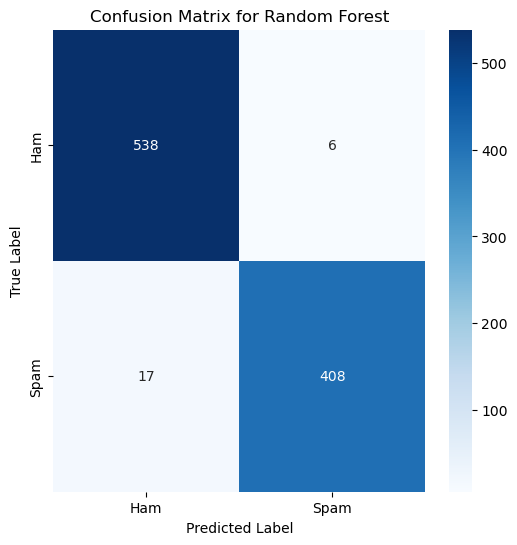

In [11]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')

data = pd.read_csv('spamham.csv', encoding='ISO-8859-1')
data = data[['Text', 'Label']]
data.columns = ['message', 'label']
data.dropna(inplace=True)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [ps.stem(word) for word in tokens]
    return " ".join(tokens)

data['message'] = data['message'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['message']).toarray()
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Classification Report:\n{report}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

